In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import time as time



## EULER EXPLICIT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# PARAMETERS
M = 100        # number of time steps
T = 1          # maturity
K = 255.0      # strike price of the option
S0 = 250.0     # initial price of the underlying asset
r = 0.035      # risk-free interest rate
sigma = 0.2    # volatility
N = 1000       # number of price grid points
dt = T / M     # time step for EDP resolution
Smax = 500     # maximum underlying asset price for resolution

Xmax = 10      
Xmin = -10
dx = (Xmax - Xmin) / N

# Initializing of Matrix and Vectors
C = np.zeros((M + 1, N + 1))
X = dx * np.arange(N + 1)
t = dt * np.arange(M + 1)

C[M, :] = np.maximum(-X, 0)
C[:, 0] = (1/r*T) * (1 - np.exp(-r*(T-t)))
C[:, N] = 0.0

# matrice du système linéaire (qui ne dépend pas du temps)
A = np.diag(-1 / dt + (sigma**2 / dx**2) * X[1:N]**2 - (1 / T + r * X[1:N]) / dx) \
   + np.diag(- 0.5 * (sigma / dx)**2 * X[1:N-1]**2 + (1 / T + r * X[1:N-1]) / dx, 1) \
   - np.diag(0.5 * (sigma / dx)**2 * X[2:N]**2, -1)

main_diag = -1 / dt - (sigma**2 * X[1:N]**2) / dx**2
upper_diag = 0.5 * (sigma**2 * X[2:N]**2 / dx**2) - ((1 / T + r * X[2:N]) / (2 * dx))
lower_diag = 0.5 * (sigma**2 * X[1:N-1]**2 / dx**2) + ((1 / T + r * X[1:N-1]) / (2 * dx))

   
# on lance le chronomètre
start = time.time()
# boucle en temps
for i in range(M - 1, -1, -1):

    b = -1.0 / dt * C[i + 1, 1:N]

    b[0] += 0.5 * (sigma / dx)**2 * X[1]**2 * C[i, 0]
    b[N - 2] += (0.5 * (sigma / dx)**2 * X[N - 1]**2 - (1 / T + r * X[N - 1]) / dx) * C[i, N]

    C[i, 1:N] = np.linalg.solve(A, b)
    # garantir que les prix restent non négatifs
    #C[i, 1:N] = np.maximum(C[i, 1:N], 0)
end = time.time()
print(end - start)



# Affichage des résultats
plt.plot(X, C[0,:])
plt.xlabel('Prix du sous-jacent S')
plt.ylabel('Prix de l\'option')
plt.title('Prix de l\'option call asiatique en fonction de S')
plt.grid(True)
plt.show()


## EULER IMPLICIT

Elapsed time: 2.19 seconds


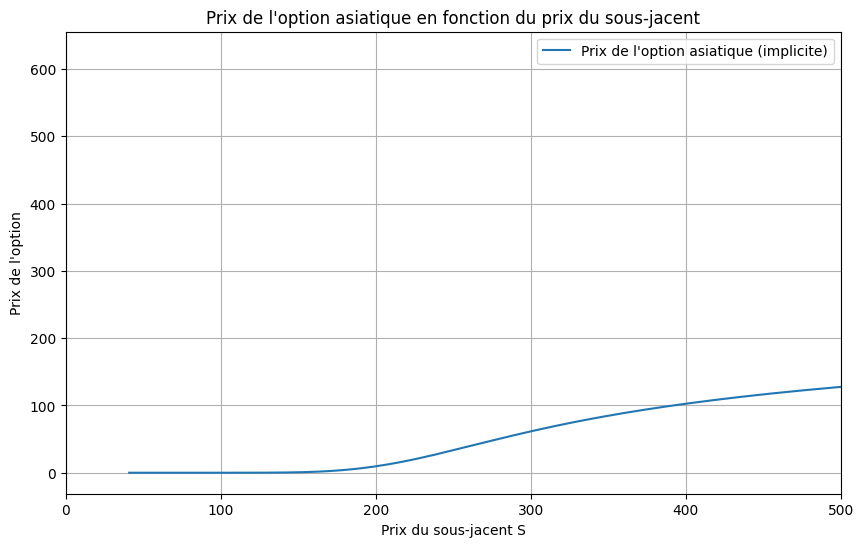

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import time

# PARAMETERS
M = 100        # Number of time steps
T = 1.0        # Maturity
K = 205.0    # Strike price of the option
S0 = 200.0  # Initial price of the underlying asset
r = 0.035      # Risk-free interest rate
sigma = 0.3   # Volatility
N = 1000       # Number of price grid points
dt = T / M     # Time step
Xmax = 5.0    # Maximum for the spatial grid (x)
Xmin = -5.0   # Minimum for the spatial grid (x)
dx = (Xmax - Xmin) / N  # Spatial step

# Initializing matrices and vectors
C = np.zeros((M + 1, N + 1))  # Option price matrix
X = np.linspace(Xmin, Xmax, N + 1)  # Spatial grid
t = np.linspace(0, T, M + 1)        # Time grid

# Boundary conditions
C[M, :] = np.maximum(-X, 0)  # At maturity f(T, x) = max(-x, 0)
C[:, 0] = 0.0                # For x -> -∞
C[:, N] = 0.0                # For x -> ∞

# Matrix A for the implicit scheme
main_diag = -1 / dt - (sigma**2 * X[1:N]**2) / dx**2
upper_diag = 0.5 * (sigma**2 * X[2:N]**2 / dx**2) - ((1 / T + r * X[2:N]) / (2 * dx))
lower_diag = 0.5 * (sigma**2 * X[1:N-1]**2 / dx**2) + ((1 / T + r * X[1:N-1]) / (2 * dx))

A = np.diag(main_diag) + np.diag(upper_diag, 1) + np.diag(lower_diag, -1)

# Start the timer
start = time.time()

# Time-stepping loop (implicit)
for i in range(M - 1, -1, -1):  # Backward in time
    # Right-hand side vector
    b = -C[i + 1, 1:N] / dt

    # Add boundary conditions
    b[0] -= lower_diag[0] * C[i, 0]
    b[-1] -= upper_diag[-1] * C[i, N]

    # Solve the linear system A * C[i, 1:N] = b
    C[i, 1:N] = np.linalg.solve(A, b)

# Stop the timer
end = time.time()
print(f"Elapsed time: {end - start:.2f} seconds")

# Convert x to S (price of the underlying asset)
S = K / np.maximum(X, 1e-5)  # Avoid division by zero or negative x

# Plotting the result

plt.figure(figsize=(10, 6))
plt.plot(S, S0*C[0, :], label="Prix de l'option asiatique (implicite)")
plt.xlabel("Prix du sous-jacent S")
plt.ylabel("Prix de l'option")
plt.title("Prix de l'option asiatique en fonction du prix du sous-jacent")
plt.xlim([0, Smax])  # Limit the x-axis to valid S values
plt.legend()
plt.grid()
plt.show()

plt.show()

